### Index No = *180601T*

### Name = *Shyamal.M.A.L*

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import  Axes3D

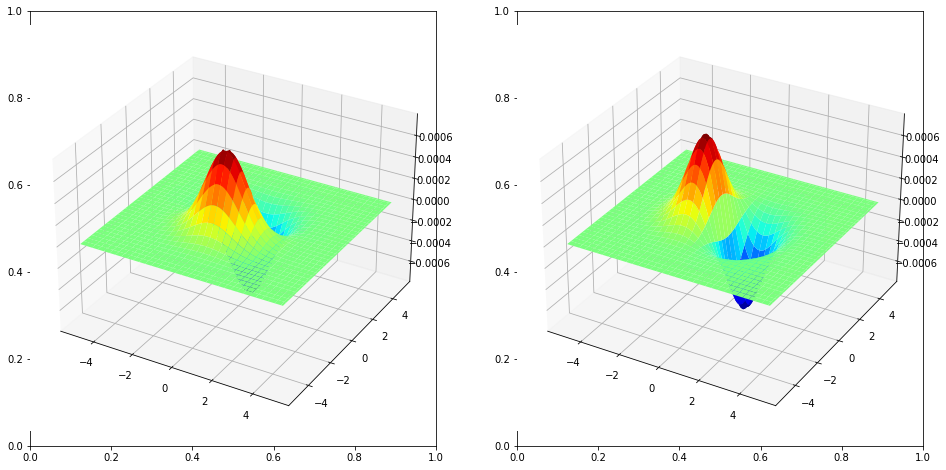

In [6]:

delta = 0.1
XX , YY = np.meshgrid(np.arange(-5,5+delta,delta), np.arange(-5,5+delta,delta))

sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /= np.sum(g)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
g_x = cv.filter2D(g,-1,sobel_v)
sobel_h = sobel_v.transpose()
g_y = cv.filter2D(g,-1,sobel_h)

fig,ax = plt.subplots(1,2, figsize = (16,8))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')


surf1 = ax1.plot_surface(XX, YY, g_x, cmap = cm.jet,  linewidth = 0, antialiased = True)
surf2 = ax2.plot_surface(XX, YY, g_y, cmap = cm.jet,  linewidth = 0, antialiased = True)
ax1.grid("off")
plt.show()

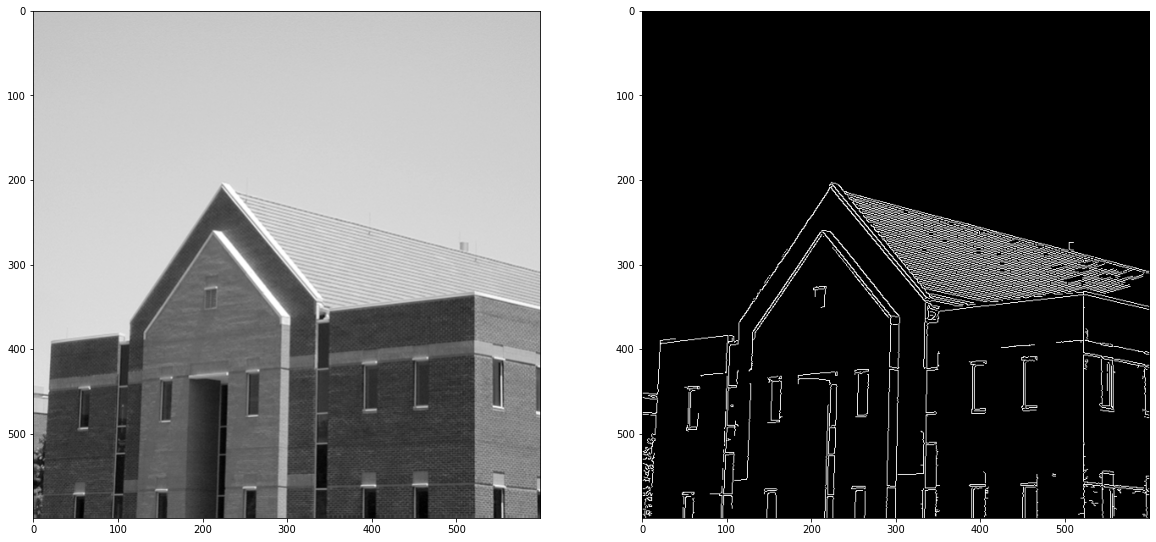

In [3]:
img = cv.imread("building.tif")
assert img is not None

edges = cv.Canny(img ,100 ,200)

fig, ax = plt.subplots(1,2, figsize =(20,20))
ax[0].imshow(img , cmap="gray")
ax[1].imshow(edges , cmap="gray")
plt.show()

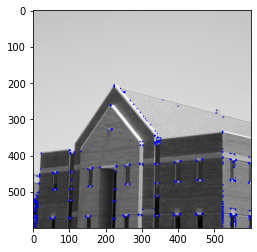

In [4]:
img = cv.imread("building.tif")
assert img is not None

gray = np.float32(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)

img[dst > 0.01*dst.max()] = [0,0,255]

cv.imshow("dst",img)
cv.waitKey(0)
cv.destroyAllWindows()

plt.imshow(img)
plt.show()



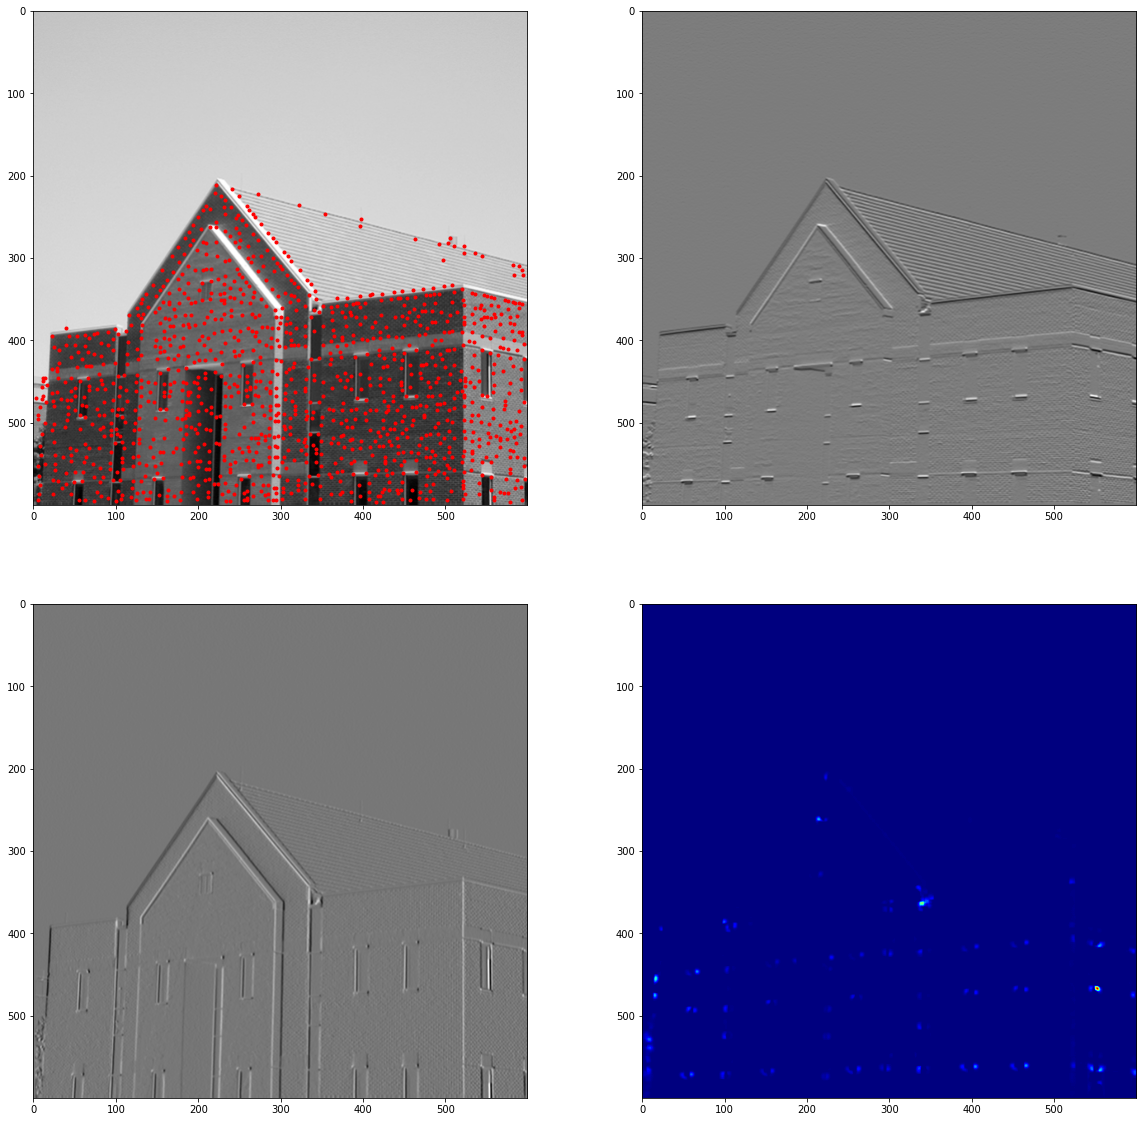

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max
from matplotlib import cm

img = cv.imread("building.tif", cv.IMREAD_COLOR)
assert img is not None

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)

Ix = cv.filter2D(I, -1, sobel_v)
Iy = cv.filter2D(I, -1, sobel_h)

sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21= m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e4] = 0
coordinates = peak_local_max(R, min_distance=2)

fig, ax = plt.subplots(2, 2, figsize = (20 ,20))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[0, 1].imshow(Ix + 127, cmap='gray')
ax[1, 0].imshow(Iy + 127, cmap='gray')
ax[1, 1].imshow(R+127, cmap=cm.jet)

plt.show()




In [ ]:
albert = cv.imre